이 데이터셋인 "Spotify's Long Hits (2014-2024) 🎶"은 2014년부터 2024년까지의 기간 동안 높은 재생 시간으로 돋보이는 800개 이상의 음악 트랙을 독특하게 제공합니다. 이 데이터셋은 음악의 길이와 청취자 선호도의 진화를 관찰할 수 있는 독특한 창으로 기능합니다. 각 트랙은 일반적인 길이를 뛰어넘을 뿐만 아니라 해당 시기의 본질을 담고 있어 깊은 음악 분석에 유용한 자료로서 손색이 없습니다.

데이터 과학 응용 분야:
이 데이터셋은 다양한 데이터 과학적 연구를 위한 구조를 가지고 있습니다. 연구자 및 열성 애호가들은 음악의 길이 변화를 발견하기 위한 트렌드 분석, 장르와 트랙 길이 간의 관계를 탐구하기 위한 장르 기반 연구, 또는 다양한 특징을 기반으로 트랙 인기 예측을 위한 머신러닝 모델 훈련 등 다양한 분석을 진행할 수 있습니다. 그러나 Spotify의 지침에 따라 데이터셋을 교육 목적으로만 사용하도록 주의해야 합니다.

열 설명:

ID: 각 트랙에 대한 Spotify에서의 고유 식별자로, 해당 트랙에 직접 액세스할 수 있도록 도와줍니다.
Name: 트랙의 제목으로, 해당 트랙을 식별합니다.
Duration (Minutes): 각 트랙의 길이를 분 단위로 제공하며, 이로써 이 작품들의 확장된 성격이 강조됩니다.
Artists: 참여한 아티스트의 이름으로, 각 작품의 협업 풍경을 제공합니다.

In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px # https://wikidocs.net/180607
from wordcloud import WordCloud, STOPWORDS 
# 태그 클라우드(영어: tag cloud) 또는 워드 클라우드(word cloud)는 메타 데이터에서 얻어진 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 늘어놓아 표시하는 것이다. 
# Stopwords 는 빈도수를 계산할 때 제외되는 단어입니다. 
# https://lovit.github.io/nlp/2018/04/17/word_cloud/
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotifys-long-hits-2014-2024/spotify_long_tracks_2014_2024.csv


In [37]:
df = pd.read_csv('/kaggle/input/spotifys-long-hits-2014-2024/spotify_long_tracks_2014_2024.csv')

In [38]:
df.info() #null 값이 없음, 3개열 object 타입, 1개 정수형 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  816 non-null    object
 1   Name                816 non-null    object
 2   Duration (Minutes)  816 non-null    int64 
 3   Artists             816 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [39]:
df

,ID,Name,Duration (Minutes),Artists
0,026O2YP2wRl9h3Ht9ClZST,Steady Rain in a Forest with Light Background ...,100,Nature Sounds
1,0DXnjJxJBvgMvBjG6Jug7I,Soundarya Lahari,66,Mambalam Sisters
2,6BFn78qFy9bRqKHTMfhnNv,Waves of Abundance & Fullfillment,60,Zen Life Relax
3,1dNwMOMtq3yflXibbqgLku,Mosquito Solution Anti Teen Street Party or Te...,45,Device Sound Effect
4,290gfei8moWWSh8qTVkTT3,Ibiza Sunset Tibetan Singing Bowl Sessions 7 (...,44,Tibetan Singing Bowls
...,...,...,...,...
811,0OYbUI94jw0vLQeAmKKZ53,Keep On,5,Vanilla
812,4Wmjr8wNvU4O3tj3CXRmkE,雨の街 - Re:Lilly remix,5,Re:Lilly
813,465EdPfedCDmofyICPGmiF,Měla Jsem Vrásky Na Čele,5,Jana Rychterová
814,2NNBTCfzAgyolaaZNNzD4O,ARIGATOUNO WA - Cover ver.,5,Baby Band


In [40]:
print(df.isnull().sum())

ID                    0
Name                  0
Duration (Minutes)    0
Artists               0
dtype: int64


In [41]:
len(df.Artists.unique()) #unique() 고유값 확인 ,  https://jaaamj.tistory.com/112

812

In [42]:
df.describe() # 통계 요약 생성

,Duration (Minutes)
count,816.000000
mean,6.980392
std,5.907642
min,5.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,100.000000


In [43]:
df['Duration (Minutes)'].unique() # 음악 트랙의 길이, 고유값 정수확인

array([100,  66,  60,  45,  44,  35,  33,  32,  31,  30,  29,  28,  27,
        22,  21,  20,  18,  16,  15,  14,  13,  12,  11,  10,   9,   8,
         7,   6,   5])

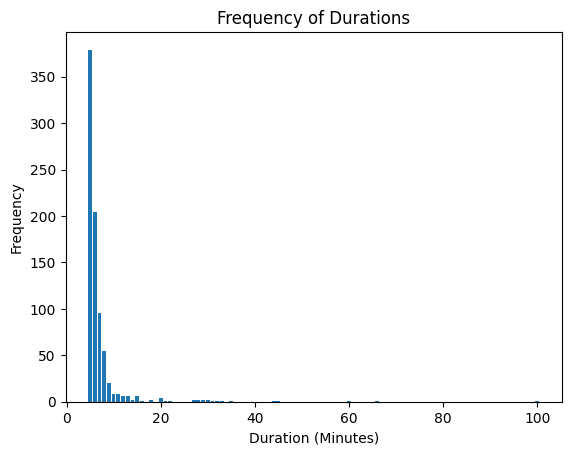

In [44]:
durations_counts = df['Duration (Minutes)'].value_counts() 
plt.bar(durations_counts.index, durations_counts.values)
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.title("Frequency of Durations")
plt.show()
# 각 음악의 길이에 따른 빈도 분포

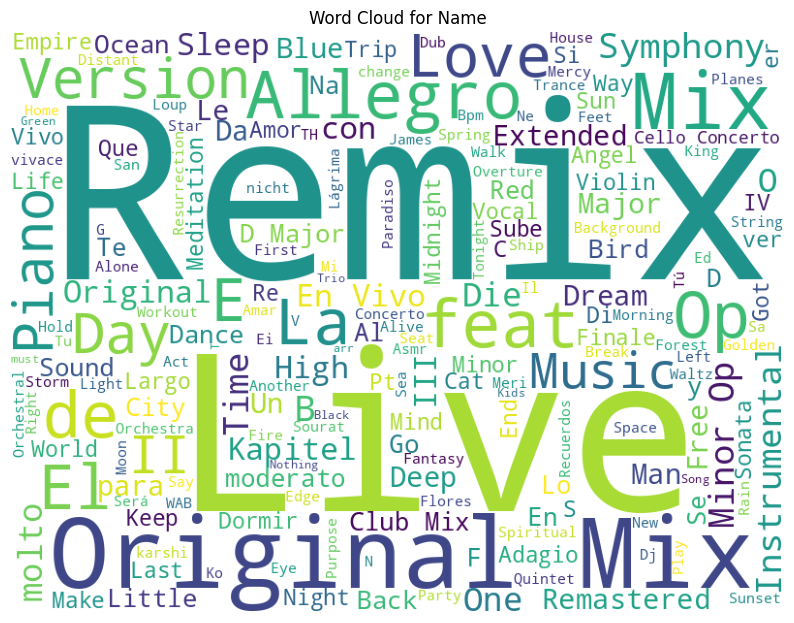

In [45]:
# 'Name' 열의 음악 이름에 포함된 단어들을 시각화
text = " ".join(df["Name"]) # 음악 이름을 공백으로 문자열 결합 
stop_words = set(STOPWORDS) # 불용어(stop words) 세트를 생성, 예를 들어 "the", "and", "in"과 같은 흔하게 나타나는 단어들이 포함
filtered_text = " ".join([word for word in text.split() if word not in stop_words]) 
# 불용어를 제거한 결과를 filtered_text에 저장
# split() 함수를 사용하여 문자열을 단어 단위로 나누고, 리스트 컴프리헨션을 이용하여 불용어가 아닌 단어들만 선택하여 다시 공백을 이용하여 결합
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(filtered_text) 
# WordCloud 객체를 생성.generate() 텍스트 데이터를 기반으로 워드 클라우드를 생성

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud for Name")
plt.show()

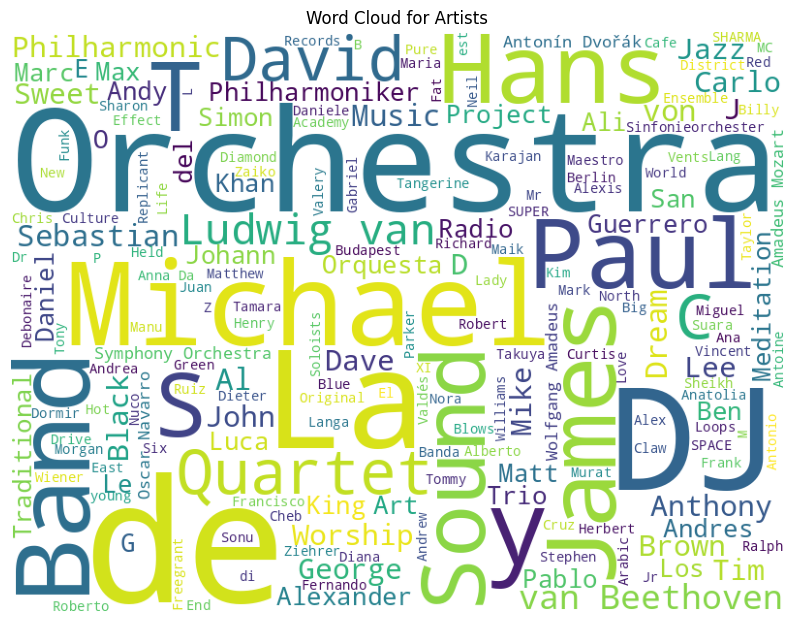

In [46]:
text = " ".join(df["Artists"])
stop_words = set(STOPWORDS)
filtered_text = " ".join([word for word in text.split() if word not in stop_words])
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(filtered_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud for Artists")
plt.show()

pandas 활용과 시각화에 대해서 알아볼수있는 데이터셋이었다.